In [1]:
import pandas as pd

In [2]:
import numpy as np
from sklearn.decomposition import PCA
from sklearn.decomposition import KernelPCA
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import PowerTransformer

In [3]:
from sklearn.cluster import KMeans
from sklearn.manifold import TSNE
from sklearn.cluster import AgglomerativeClustering
from sklearn.ensemble import IsolationForest
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [4]:
#function for t-sne Visualization
def T_sne_Visual(data , Num_Cluster):
    tsne = TSNE(n_components=2, verbose=0, perplexity=30, n_iter=300 , random_state=42)
    tsne_results = tsne.fit_transform(data)
    data['tsne-2d-one'] = tsne_results[:,0]
    data['tsne-2d-two'] = tsne_results[:,1]
    plt.figure(figsize=(16,10))
    sns.scatterplot(
        x="tsne-2d-one", y="tsne-2d-two",
        hue="y",
        palette=sns.color_palette("hls", Num_Cluster),
        data=data,
        legend="full",
        alpha=0.3
    )

In [5]:
#Make label with Kmeans
def Make_labels_Kmeans(data):
    Kmeans_object = KMeans(n_clusters=4 , random_state=42 , n_init=10)
    Kmeans_object.fit_transform(data)
    data["y"] = Kmeans_object.labels_

    return data

In [6]:
def Random_Cut_Forest(data):
    RCF_Model = IsolationForest(random_state=42 , n_estimators=100,
    max_samples=0.5,
    contamination=0.2,
    max_features=0.6).fit(data)
    
    data["y"] = RCF_Model.predict(data)

    return data

In [7]:
CC_data = pd.read_csv("CC GENERAL.csv")

In [8]:
CC_data.head()

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,C10001,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,C10002,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,C10003,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,C10004,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,NaN,0.000000,12
4,C10005,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12


# Handle Missing Values with Mean

In [9]:
fill_missing_value = {"CREDIT_LIMIT" : CC_data["CREDIT_LIMIT"].mean() , 
                     "MINIMUM_PAYMENTS" : CC_data["MINIMUM_PAYMENTS"].mean()}

CC_data = CC_data.fillna(value=fill_missing_value)

In [10]:
CC_data = CC_data.set_index("CUST_ID")

## Test Skewness in data

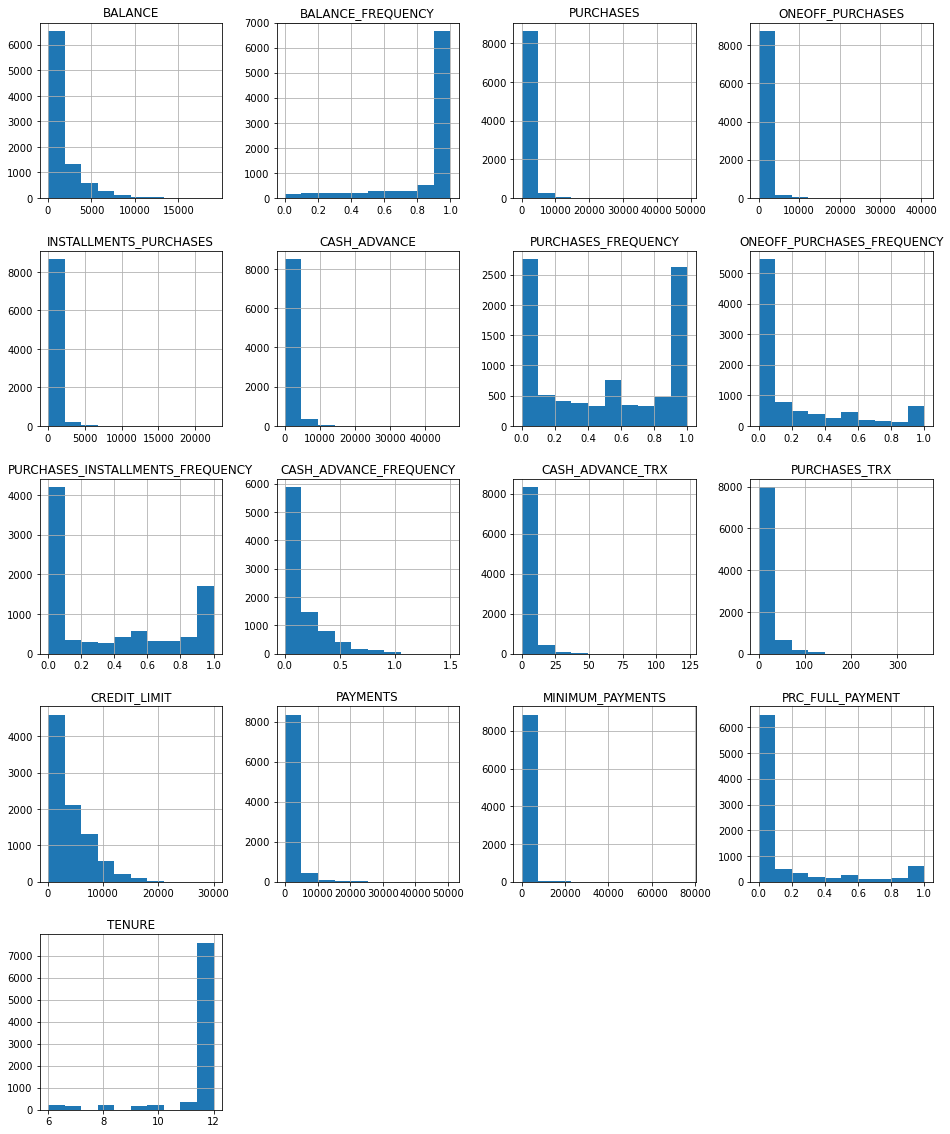

In [18]:
CC_data.hist(figsize=(16 , 20));

# Min Max Scalar

In [11]:
Min_Max_scalar = MinMaxScaler()
CC_data_Scaled = Min_Max_scalar.fit_transform(CC_data)

# Power Transformer for Making the distribution Gaussion

In [12]:
#power transformer
# pt = PowerTransformer()
# CC_data = pt.fit_transform(CC_data)

# Handle Skewness in data

In [13]:
# df_copy = np.sqrt(df_copy)

# Clustering Using Kmeans

### After I made EDA on the data I start handle missing values with mean and then made MinMax Scaler which give a good result in clustering without additional handling and this interesting that minmax scalar only can fix the overlab ranges between clusters and it's features 

### Also when I tried the power transformation for handling the distribution of data and sqrt to fix the skewness It was a bad result so there is no need for use it

In [ ]:
CC_data_of_Kmeans = Make_labels_Kmeans(pd.DataFrame(CC_data_Scaled))

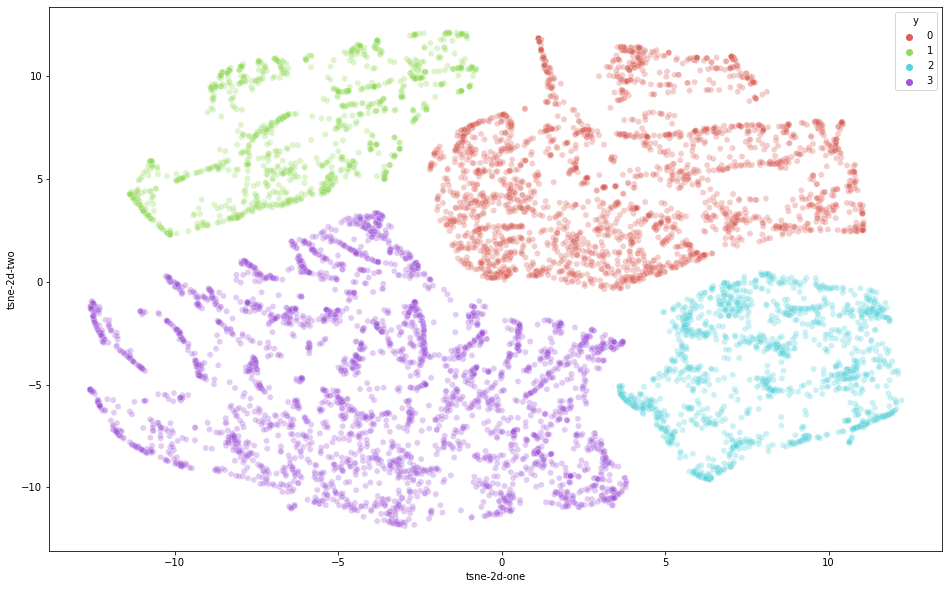

In [15]:
T_sne_Visual(CC_data_of_Kmeans , 4)

## Isolation Forest

### Then I started to try Random cut Forrest to detect the anomalies data but it was not so good after a lot of trials then I try kmeans after I drop the anomalies but the result was so bad, so Random forest was not a good anomaly detection on this case
 

In [16]:
RCF_data = Random_Cut_Forest(pd.DataFrame(CC_data_Scaled))

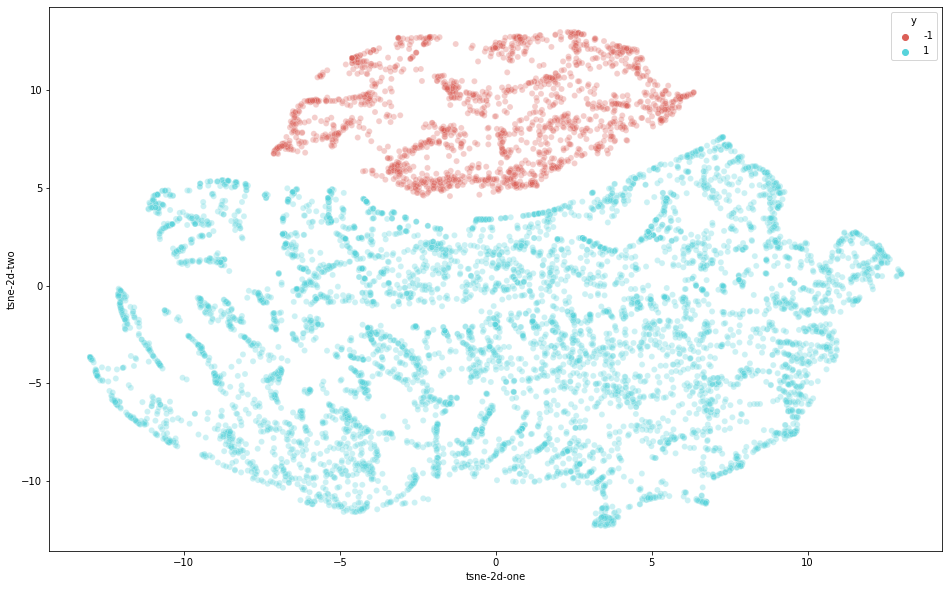

In [17]:
T_sne_Visual(RCF_data , 2)

In [18]:
CC_data_Without_Anomilies = RCF_data.drop(RCF_data[RCF_data["y"] == -1].index)

In [19]:
Kmeans_Anomilies = Make_labels_Kmeans(pd.DataFrame(CC_data_Without_Anomilies))

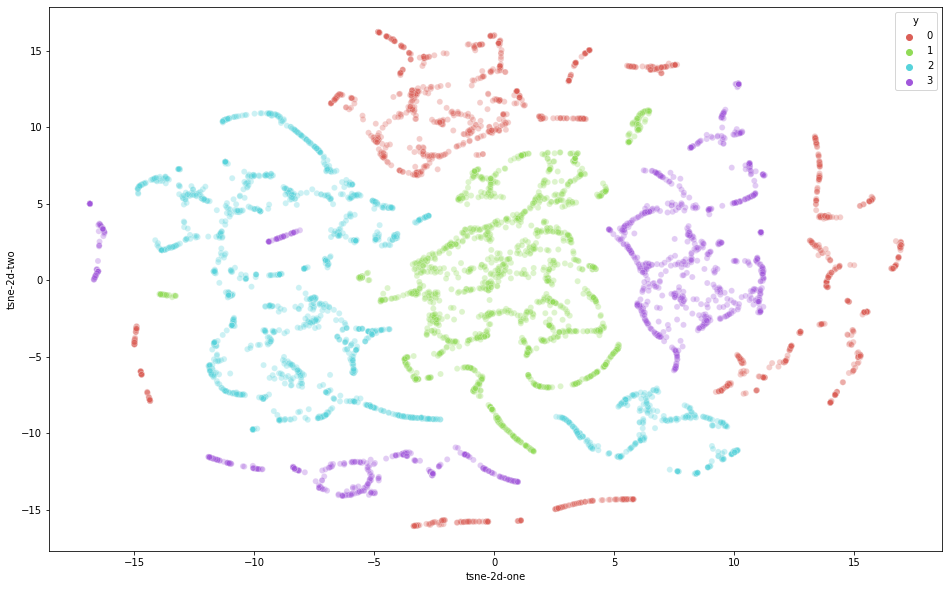

In [20]:
T_sne_Visual(Kmeans_Anomilies , 4)

# Make PCA then Kmeans

### Once again I tried PCA and Kerenal PCA with Kmeans but I found that Kerenal PCA was better in this case It gives me well-isolated clusters 

In [21]:
pca = PCA(n_components = 4)

In [22]:
PCA_Model = pca.fit(CC_data_Scaled)

In [23]:
print(PCA_Model.explained_variance_ratio_)
print(PCA_Model.singular_values_)

[0.49597206 0.14054044 0.12844489 0.07676572]
[54.25671359 28.88188507 27.61107315 21.34560858]


In [24]:
CC_data_PCA = pd.DataFrame(PCA_Model.transform(CC_data_Scaled))

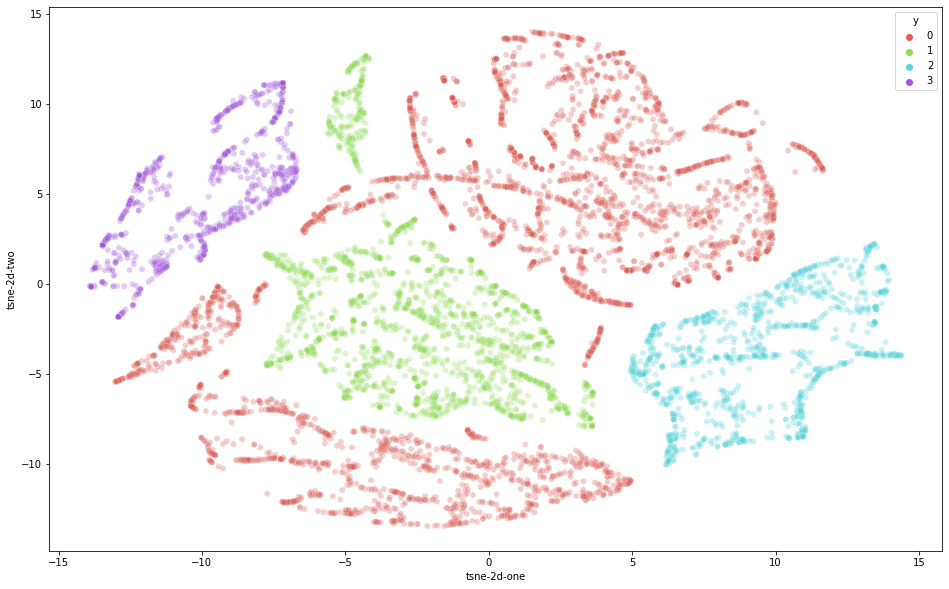

In [25]:
PCA_Kmeans_data = Make_labels_Kmeans(CC_data_PCA)
T_sne_Visual(PCA_Kmeans_data , 4)

## KMeans With kernel PCA

In [26]:
kpca = KernelPCA(n_components=4, kernel='rbf')

In [27]:
KPCA_Model = kpca.fit(CC_data_Scaled)
CC_data_K_PCA = pd.DataFrame(KPCA_Model.transform(CC_data_Scaled))

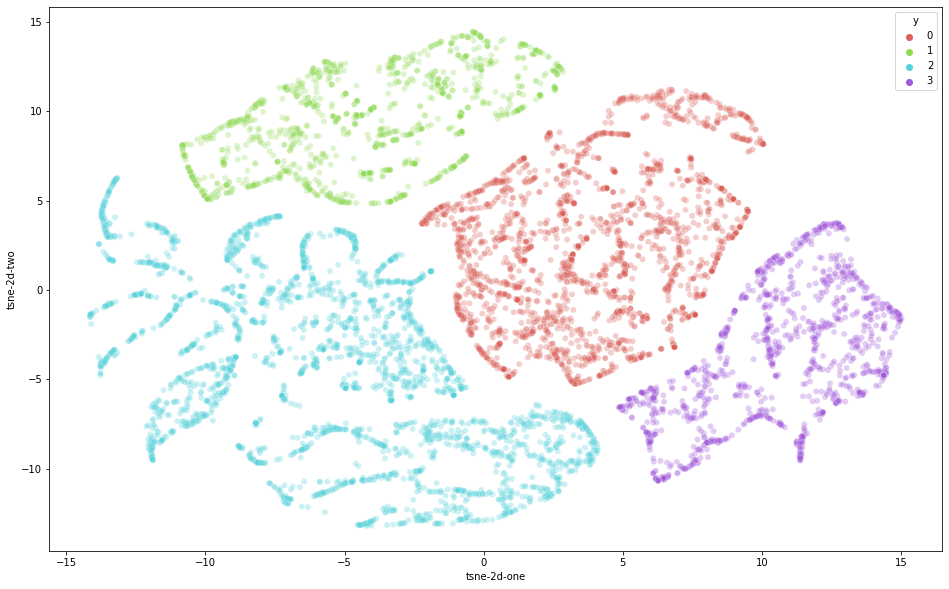

In [28]:
Kmeans_KPCA_data = Make_labels_Kmeans(CC_data_K_PCA)
T_sne_Visual(Kmeans_KPCA_data , 4)